# Лабораторная работа №2

## Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

### **Цель рабораторной работы:** изучение способов предварительной обработки данных для дальнейшего формирования моделей.

Для работы возьмем набор данных из РК1, задача 3, датасет 6 (Human Resources)

Рассмотрим, что в нём находится:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [2]:
data = pd.read_csv('../datasets/HRDataset_v14.csv')
data.shape

(311, 36)

Рассмотрим, какие колонки есть и сколько пустых значений:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [4]:
data.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

Пустые значения есть в столбцах DateOfTermination и ManagerID.

#### Обработка пропусков в данных

Давайте просто удалим эти столбцы чтобы было проще работать.

Получим data_wec (without empty cols)

In [5]:
data_wec = data.dropna(axis = 1, how = 'any')
(data.shape, data_wec.shape)

((311, 36), (311, 34))

#### Кодирование категориальных признаков
Закодируем колонку 'SEX' с помощью one-hot encoding

In [6]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
data_tmp = data[['Sex']]
data_enc = ohe.fit_transform(data_tmp)
data_enc


<311x2 sparse matrix of type '<class 'numpy.float64'>'
	with 311 stored elements in Compressed Sparse Row format>

In [7]:
data_enc.todense()[0:10]

matrix([[0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.]])

Таким образом, получили все возможные варианты пола человека (да, их два).

#### Масштабирование данных
Для масштабирования возьмем колонку Salary (зарплату).

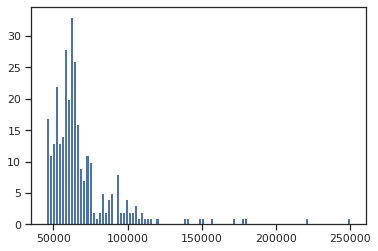

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

scaler = MinMaxScaler()
scale_data = scaler.fit_transform(data[['Salary']])

plt.hist(data['Salary'], 100)
plt.show()

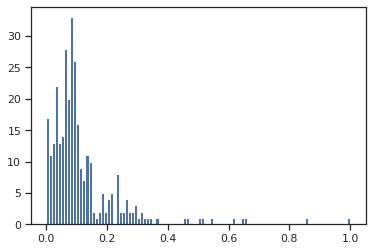

In [9]:
plt.hist(scale_data, 100)
plt.show()